<a href="https://colab.research.google.com/github/yusufsjustit/8-Adventure-Works-Power-BI-Report/blob/main/Pandas_Practice_Notebook_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas, Matplotlib and Seaborn

By the end of this notebook, you will learn;
- EDA: Perform exploratory data analysis to understand patterns and summary statistics.


- Handle Null Values: Identify, replace, and fill missing data using Pandas.


- Data Visualization: Create basic charts to explore and communicate insights.


- Outliers: Detect and remove outliers using statistical and visual methods.



In [ ]:
import pandas as pd

<p>You will be working on GDP per Capita Dataset. Please find more info below.</p>


[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

## 📘 Dataset Column Information

| Column Name            | Description |
|------------------------|-------------|
| **Country/Territory**  | Name of the country or territory. |
| **UN_Region**          | Geographic region as defined by the United Nations (e.g., Europe, Americas). |
| **IMF_Estimate**       | GDP estimate provided by the IMF (International Monetary Fund). Contains 0 for missing values. |
| **IMF_Year**           | Year of the IMF GDP estimate (0 indicates missing or not available). |
| **WorldBank_Estimate** | GDP estimate from the World Bank. |
| **WorldBank_Year**     | Year of the World Bank estimate. |
| **UN_Estimate**        | GDP estimate from the United Nations. |
| **UN_Year**            | Year of the UN GDP estimate. |


In [ ]:
# upload dataset file
from google.colab import files
uploaded = files.upload()

Saving GDP (nominal) per Capita.csv to GDP (nominal) per Capita.csv


In [ ]:
# read and import dataset
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

## EDA (Exploratory Data Analysis)

### Use this section to explore and inspect dataset.

In [ ]:
# check head


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [ ]:
 # check tail


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
219,Malawi,Africa,496,2023,635,2021,613,2021
220,South Sudan,Africa,467,2023,1072,2015,400,2021
221,Sierra Leone,Africa,415,2023,480,2021,505,2021
222,Afghanistan,Asia,611,2020,369,2021,373,2021
223,Burundi,Africa,249,2023,222,2021,311,2021


In [ ]:
# check 10 sample


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
92,Argentina,Americas,13709,2023,10636,2021,10761,2021
206,Mali,Africa,889,2023,874,2021,875,2021
76,Cook Islands,Oceania,0,0,0,0,19264,2021
151,Lebanon,Asia,3589,2020,4136,2021,6785,2021
211,Chad,Africa,667,2023,686,2021,955,2021
197,Lesotho,Africa,1208,2023,1094,2021,1040,2021
126,Colombia,Americas,6417,2023,6104,2021,6104,2021
194,Tanzania,Africa,1348,2023,1099,2021,1136,[n 10]2021
45,Brunei,Asia,35103,2023,31449,2021,31449,2021
143,Ukraine,Europe,4654,2023,4836,2021,4596,2021


In [ ]:
# check shape


(223, 8)

In [ ]:
# check info


<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 1 to 223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Territory   223 non-null    object
 1   UN_Region           223 non-null    object
 2   IMF_Estimate        223 non-null    int64 
 3   IMF_Year            223 non-null    int64 
 4   WorldBank_Estimate  223 non-null    int64 
 5   WorldBank_Year      223 non-null    int64 
 6   UN_Estimate         223 non-null    int64 
 7   UN_Year             223 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.7+ KB


- Why is that UN_year column is object data type?
- Return value count for UN_year column.

In [ ]:
# UN_Year value counts


,count
UN_Year,
2021,213
0,9
[n 10]2021,1


In [ ]:
# check statistical summary


,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate
count,223.000000,223.000000,223.000000,223.000000,223.000000
mean,15351.632287,1787.098655,18927.417040,1957.278027,17767.304933
std,22550.899445,650.695912,29103.564915,353.145867,28698.104167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1406.500000,2023.000000,2273.500000,2021.000000,2039.000000
50%,5421.000000,2023.000000,6805.000000,2021.000000,6396.000000
75%,19697.000000,2023.000000,23715.000000,2021.000000,20740.000000
max,132372.000000,2023.000000,234316.000000,2021.000000,234317.000000


* Are there outliers?

In [ ]:
# Outliers?


* What does 5421 IMF_Estimate 50% value mean ?

In [ ]:
# check value counts to return number of countries per region


,count
UN_Region,
Africa,55
Asia,51
Americas,48
Europe,48
Oceania,20
World,1


- World in UN_Region column ?

In [ ]:
# Filter for Country/Territory = World.


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
93,World,World,13440,2023,12235,2021,12230,2021


In [ ]:
# check data types for each column


,0
Country/Territory,object
UN_Region,object
IMF_Estimate,int64
IMF_Year,int64
WorldBank_Estimate,int64
WorldBank_Year,int64
UN_Estimate,int64
UN_Year,object


In [ ]:
# check average value for IMF_Estimate


np.float64(15351.632286995517)

In [ ]:
# check median value for IMF_Estimate


5421.0

In [ ]:
# check average value Worldbank_Estimate


np.float64(18927.417040358745)

In [ ]:
 # return United Kingdom only


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
33,United Kingdom,Europe,46371,2023,46510,2021,46542,2021


## groupby()

[Learn more about groupby](https://www.geeksforgeeks.org/pandas-groupby/)
<p> The groupby() function in Pandas is important for data analysis as it allows us to group data by one or more categories and then apply different functions to those groups. This technique is used for handling large datasets efficiently and performing operations like aggregation, transformation and filtration on grouped data.



In [ ]:
# Names of UN_Region
df.UN_Region.unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', 'Africa', 'World'],
      dtype=object)

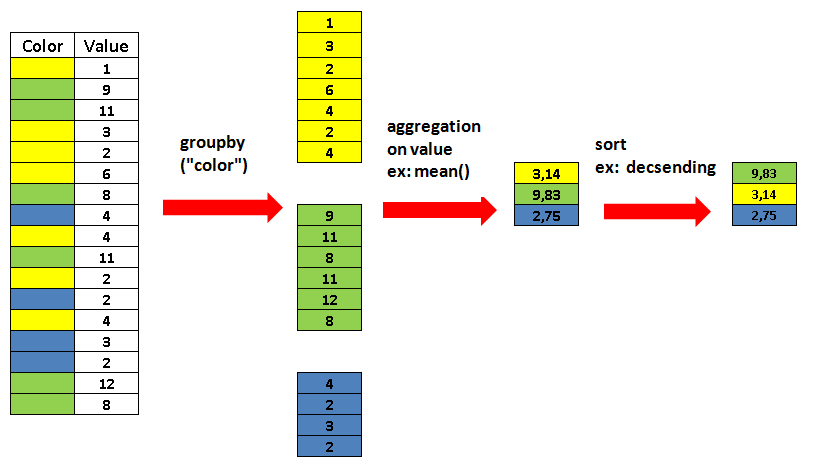

In [ ]:
# Group by UN_region and show average IMF Estimate then sort values
df.groupby("UN_Region")["IMF_Estimate"].mean().sort_values()

,IMF_Estimate
UN_Region,
Africa,2802.345455
Oceania,9133.150000
Americas,11871.041667
World,13440.000000
Asia,16665.254902
Europe,34446.750000


In [ ]:
# Group by Un_region and show average IMF Estimate then sort values
df.groupby("UN_Region")["IMF_Estimate"].median().sort_values()

,IMF_Estimate
UN_Region,
Africa,1475.0
Oceania,3926.5
Asia,6180.0
Americas,6829.5
World,13440.0
Europe,27053.0


In [ ]:
# Group by Un_region and show median Worlbank Estimate then sort values
df.groupby("UN_Region")["WorldBank_Estimate"].median().sort_values()

,WorldBank_Estimate
UN_Region,
Africa,1319.0
Asia,4566.0
Oceania,5902.0
Americas,10022.5
World,12235.0
Europe,31795.5


In [ ]:
# Display top 5 by IMF_Estimate
df.sort_values(by= "IMF_Estimate", ascending=False).head(5)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
8,Singapore,Asia,91100,2023,72794,2021,66822,2021


<h1> pandas.DataFrame.nlargest()
<p> DataFrame.nlargest(n, columns, keep='first')[source]
Return the first n rows ordered by columns in descending order.

Return the first n rows with the largest values in columns, in descending order. The columns that are not specified are returned as well, but not used for ordering.

* This method is equivalent to df.sort_values(columns, ascending=False).head(n), but more performant.

In [ ]:
# use nlargest to show top countries by IMF_Estimate
df.nlargest(5, "IMF_Estimate")

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
8,Singapore,Asia,91100,2023,72794,2021,66822,2021


In [ ]:
# use nlargest to show top countries by Wordlbank_Estimate
df.nlargest(5,"WorldBank_Estimate")

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021


In [ ]:
# use nsmallest to show bottom 5 countries by UN_Estimate
df.nsmallest(5, "UN_Estimate")

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
9,Isle of Man,Europe,0,0,87158,2019,0,0
14,Channel Islands,Europe,0,0,75153,2007,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0
37,US Virgin Islands,Americas,0,0,39552,2020,0,0
42,Guam,Oceania,0,0,35905,2021,0,0


In [ ]:
# can I fill IMF_estimate by Worlbank and UN ?
# Fill in IMF estimatete by average of WorldBank and UN.

## How to fill IMF_estimate by Worlbank and UN ?
- I will show you how to fill in IMF estimatete by average of WorldBank and UN.

## Filling 0 Values by average

### Numpy
NumPy is a Python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.

NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

NumPy stands for Numerical Python.
 [NumPy Tutorial](https://www.w3schools.com/python/numpy/numpy_intro.asp)

In [ ]:
import numpy as np

In [ ]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [ ]:
df["IMF_Estimate"] = df["IMF_Estimate"].replace(0, np.nan)
# replace 0 with null values

In [ ]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,NaN,0,234316,2021,234317,2021
2,Liechtenstein,Europe,NaN,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,NaN,0,114090,2021,112653,2021


In [ ]:
# Calculate the average of 'worldbank' and 'un' columns
df['avg_worldbank_un'] = df[['WorldBank_Estimate', 'UN_Estimate']].mean(axis=1) # axis = 1 means calcualte average in horizontal
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,avg_worldbank_un
1,Monaco,Europe,NaN,0,234316,2021,234317,2021,234316.5
2,Liechtenstein,Europe,NaN,0,157755,2020,169260,2021,163507.5
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021,133667.5
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021,100640.5
5,Bermuda,Americas,NaN,0,114090,2021,112653,2021,113371.5


In [ ]:
df["IMF_Estimate"] = df["IMF_Estimate"].fillna(df['avg_worldbank_un'])

In [ ]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,avg_worldbank_un
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021,234316.5
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021,163507.5
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021,133667.5
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021,100640.5
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021,113371.5


In [ ]:
# Drop the temporary 'avg_worldbank_un' column if not needed
df.drop(columns=['avg_worldbank_un'], inplace=True)

In [ ]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


[Visit this link to learn more about ffill](https://www.w3schools.com/python/pandas/ref_df_ffill.asp)

[Visit this link to learn more about bfill](https://www.w3schools.com/python/pandas/ref_df_bfill.asp)

## Checking Missing Values

In [ ]:
df.isnull().sum()

,0
Country/Territory,0
UN_Region,0
IMF_Estimate,0
IMF_Year,0
WorldBank_Estimate,0
WorldBank_Year,0
UN_Estimate,0
UN_Year,0


In [ ]:
 # total number of null values
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# df.dropna()
# remove null values from your data

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

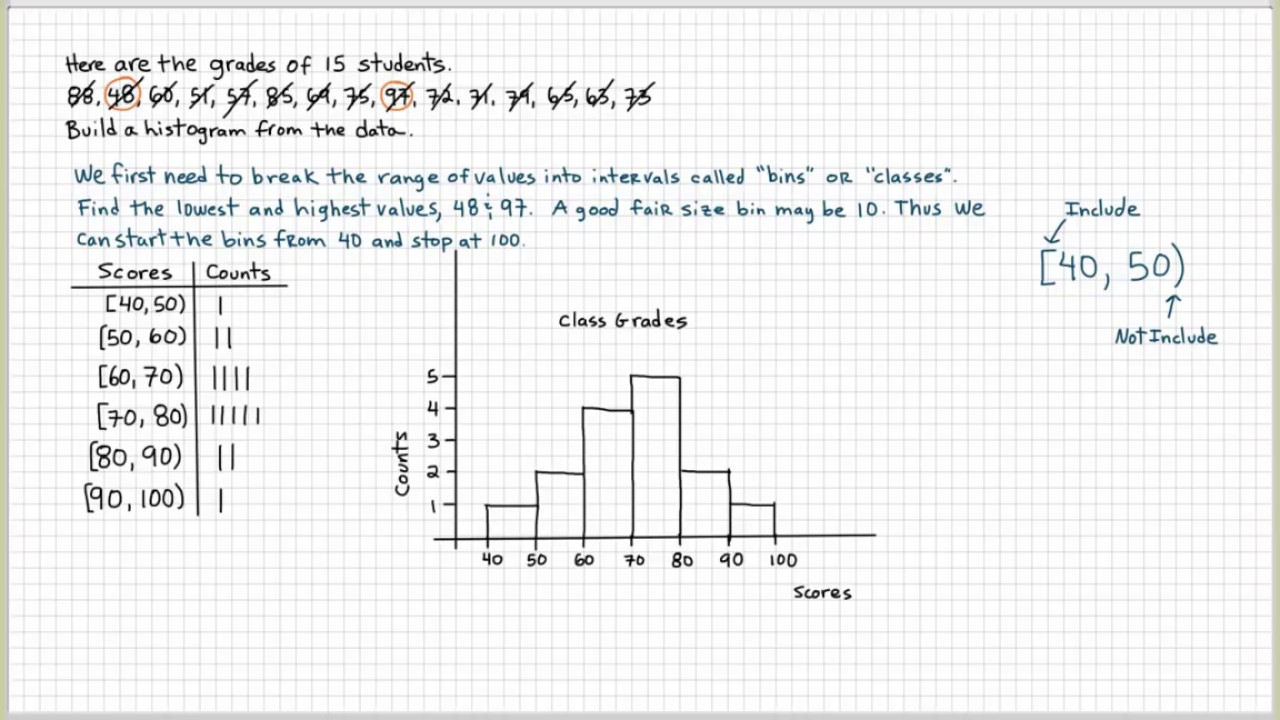

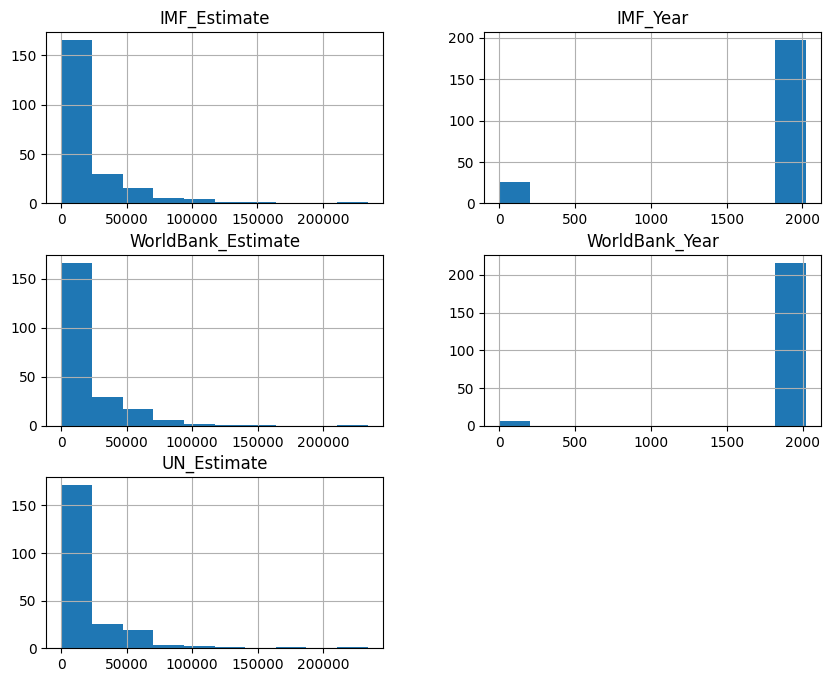

In [ ]:
df.hist(figsize=(10,8))
plt.show()

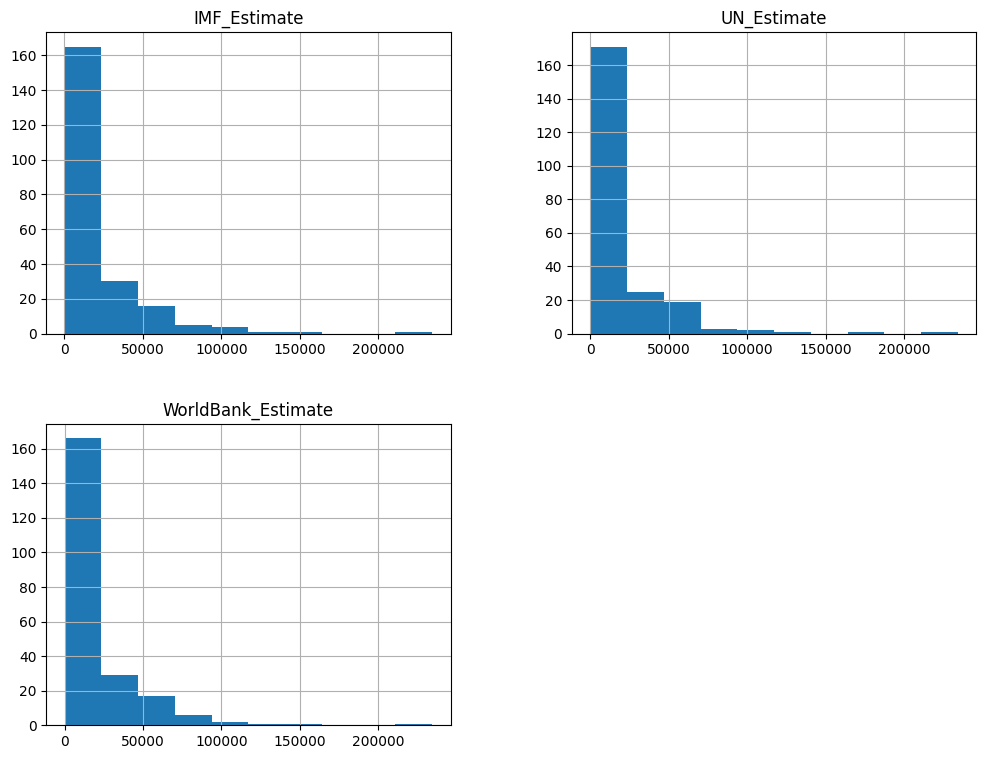

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

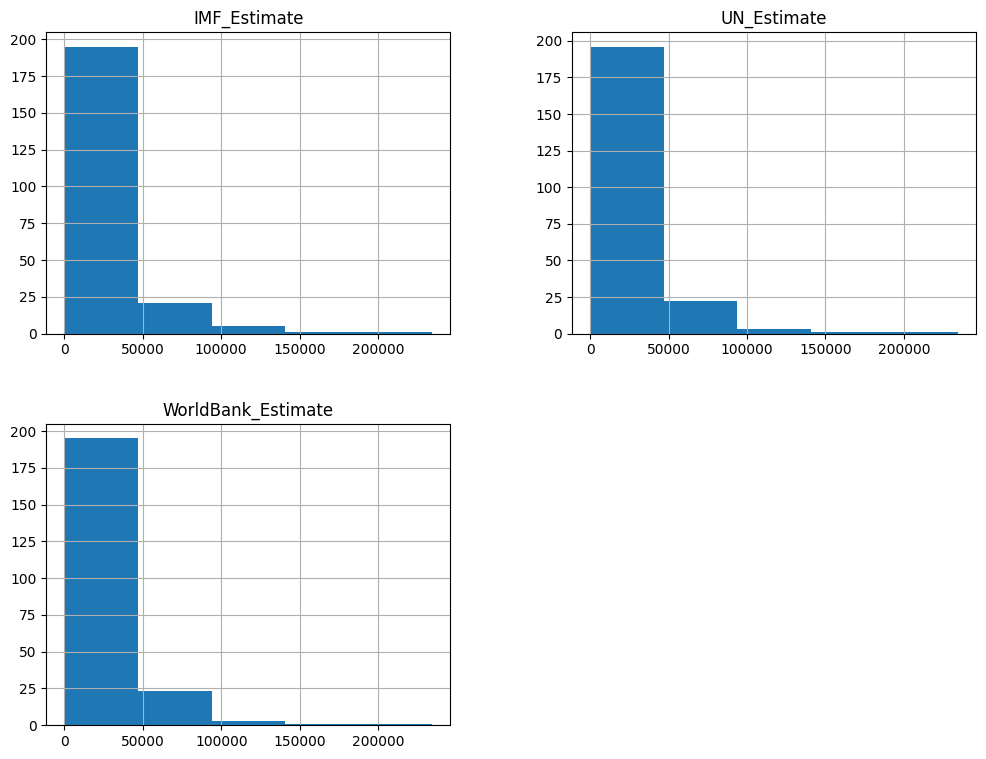

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))
# set binsize = 5
plt.show()

- How to calculate bin size?

In [ ]:
df["WorldBank_Estimate"].agg(["min","max"])

,WorldBank_Estimate
min,0
max,234316


In [ ]:
# take difference between min and max and divide by number of bins
234316/5
#1 bin size if bins=5

46863.2

In [ ]:
df[df["WorldBank_Estimate"]<=46863.2]["WorldBank_Estimate"].count()
#  there are 195 rows in the first bin

np.int64(195)

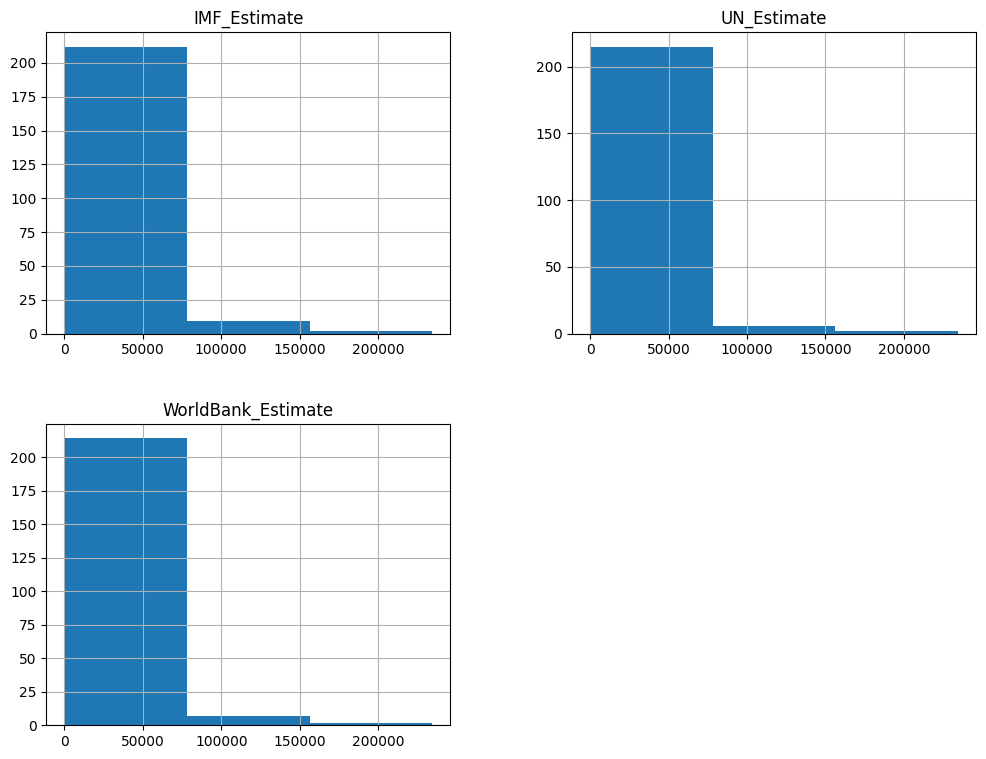

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

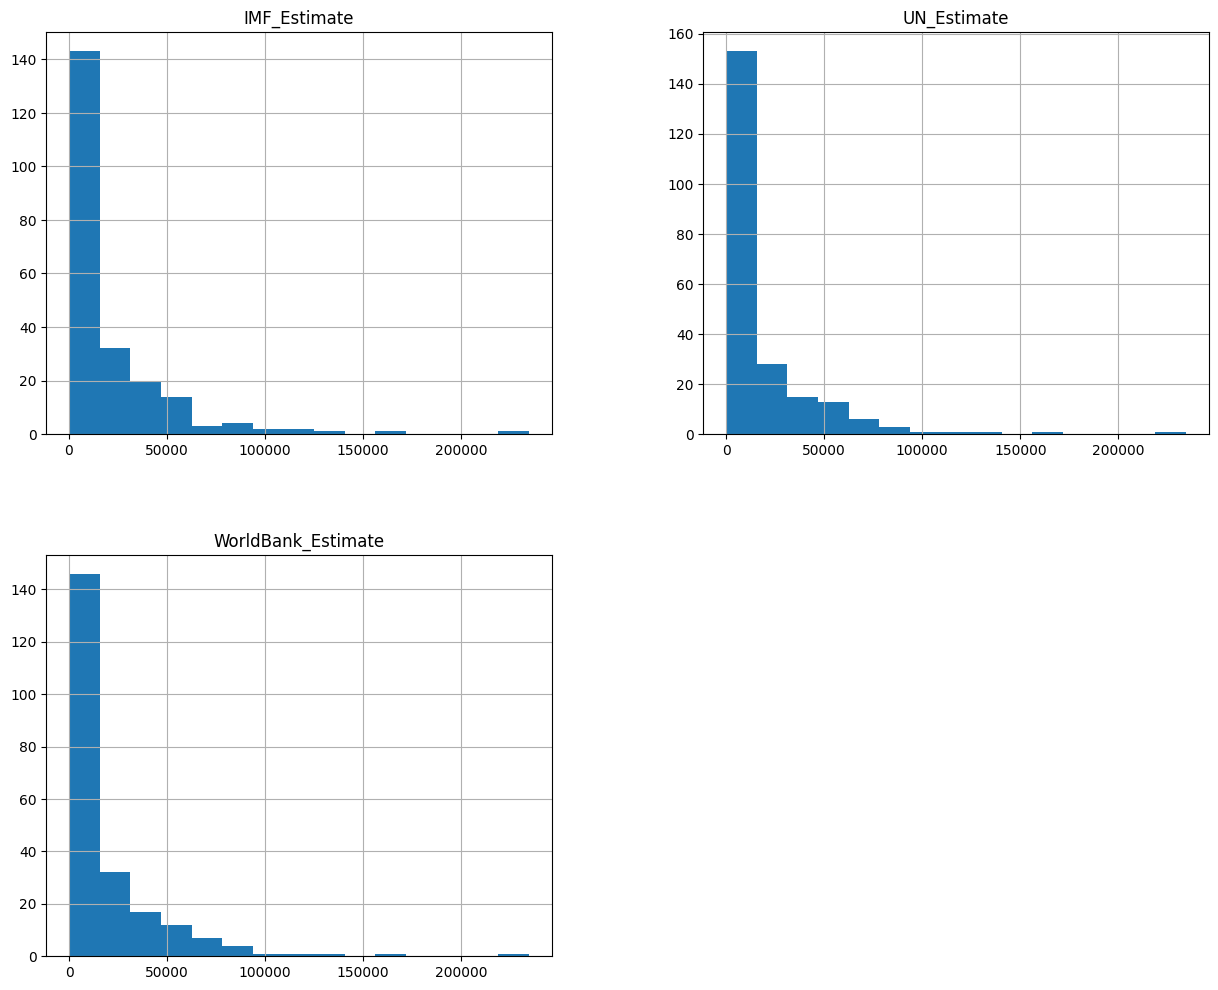

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))

#23400/15 = 15300
plt.show()
# more than 140 countries has GDP less than 15K

### Correlation Heatmap

* 1 means very high positive correlation (one inreases as well as the other)
* 1 means very high negative correlation ( one decrases as well as the other increases)
* a column has 1 correlation with itself


In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

,IMF_Estimate,UN_Estimate,WorldBank_Estimate
IMF_Estimate,1.000000,0.976263,0.974294
UN_Estimate,0.976263,1.000000,0.930331
WorldBank_Estimate,0.974294,0.930331,1.000000


### If any counry has high GDP by IMF_estimate, that country will also have very high UN_estimate. Beacuse correlation 0.97.

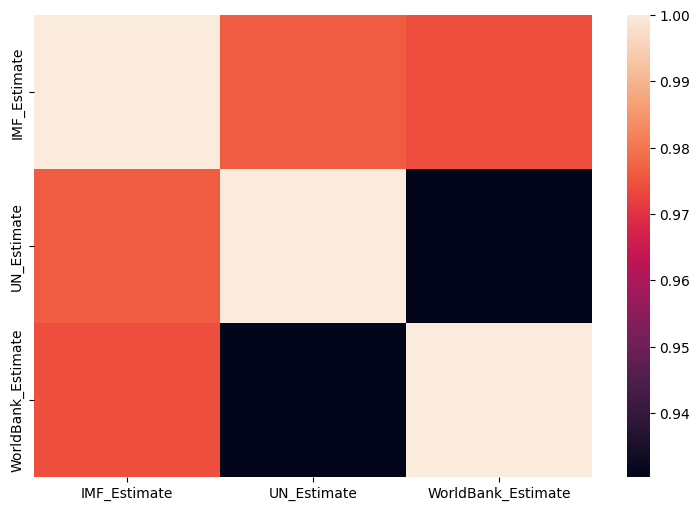

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

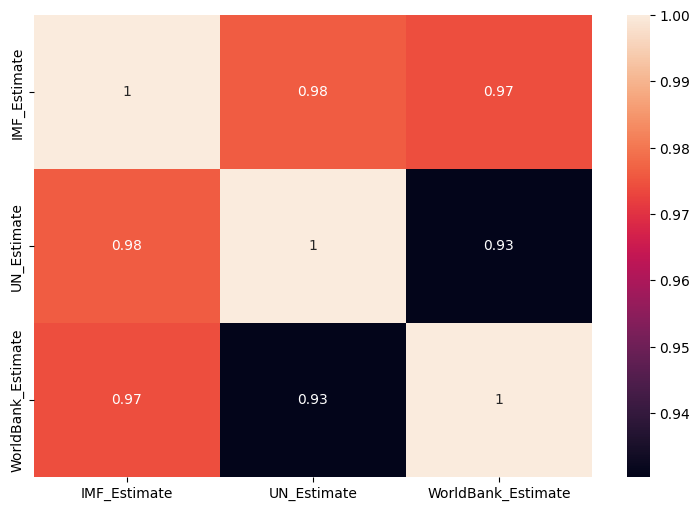

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

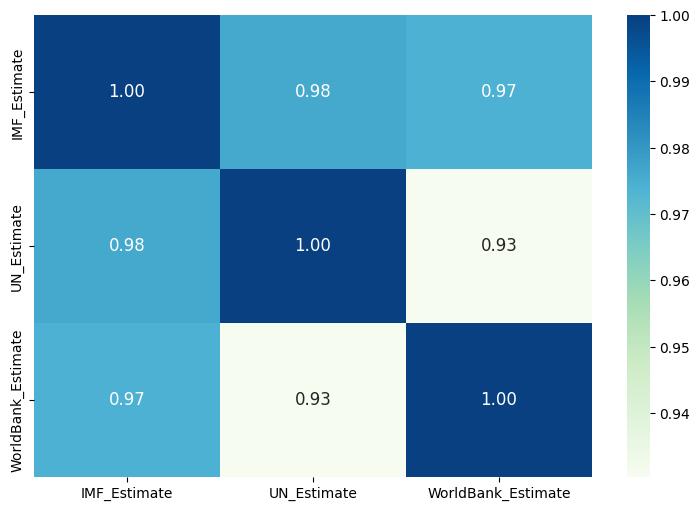

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'GnBu', annot_kws={"size": 12})
# annot show labes, cmap change colour, annot_kws change text size, fmt decimal
plt.show()

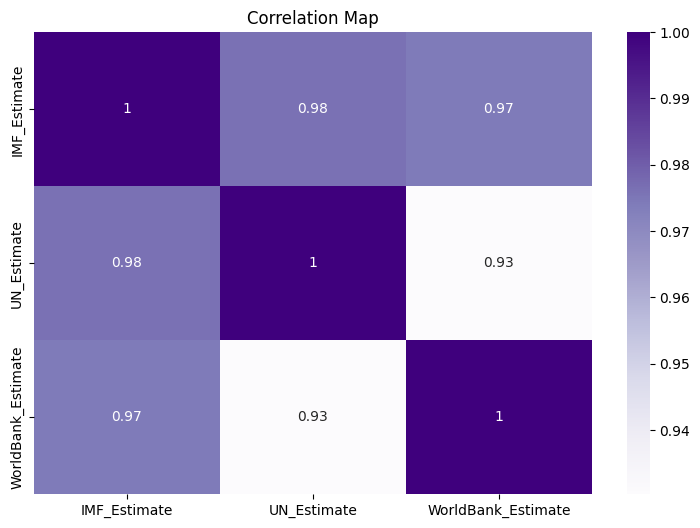

In [ ]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

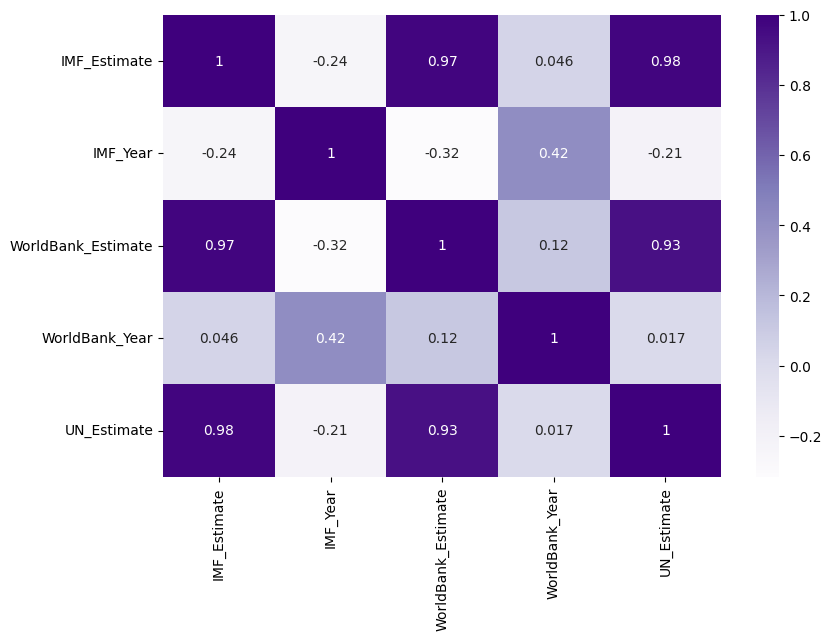

In [ ]:
corr = df.select_dtypes(include=[int, float]).corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.show()

### Bar plot

In [ ]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


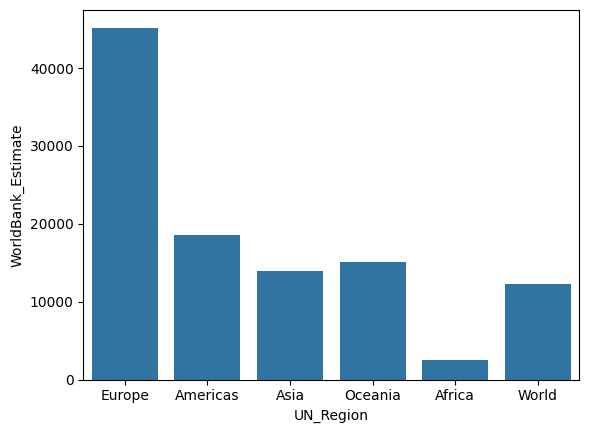

In [ ]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, errorbar=None)

plt.show()

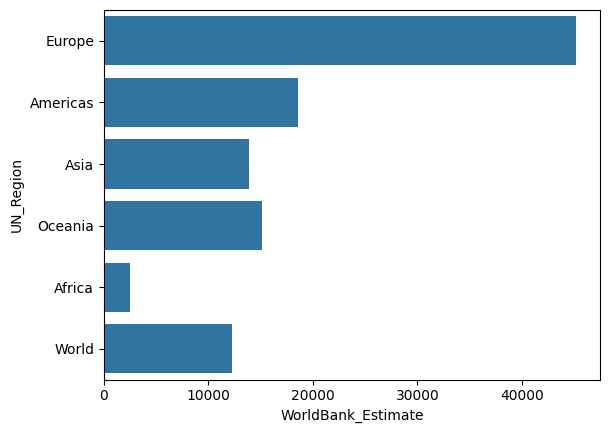

In [ ]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, errorbar=None)

plt.show()

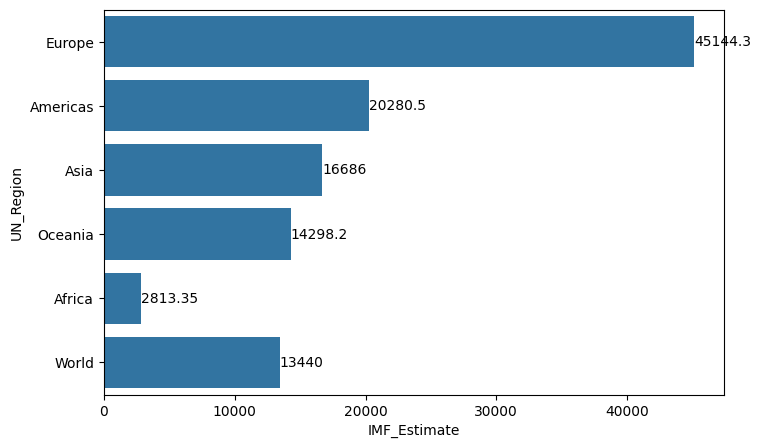

In [ ]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",
data = df, errorbar = None)

ax.bar_label(ax.containers[0])

plt.show()

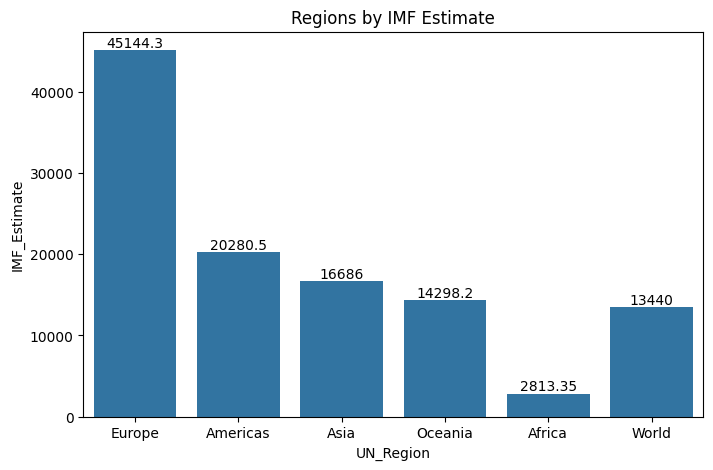

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate",
                 data = df, errorbar = None)

ax.bar_label(ax.containers[0])


ax.set_title("Regions by IMF Estimate")
plt.show()

### Scatter Plot

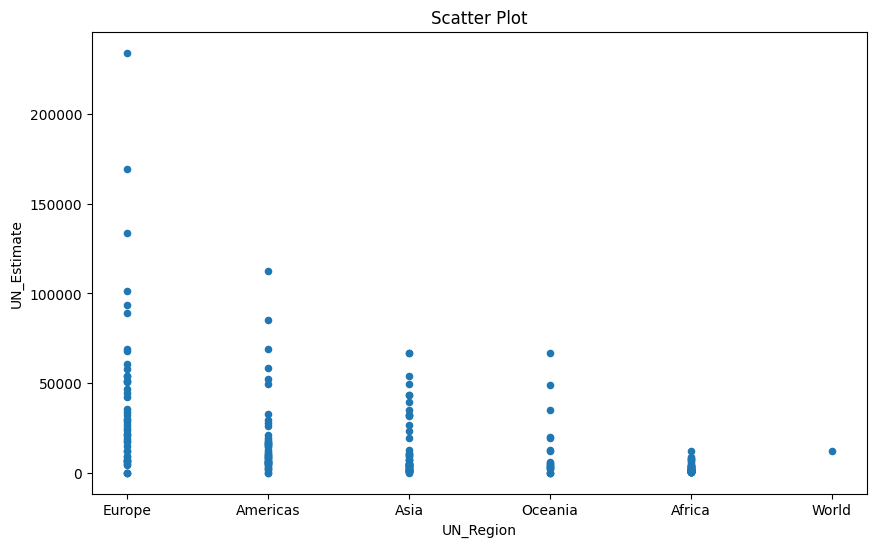

In [ ]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

### Boxplot and Outliers

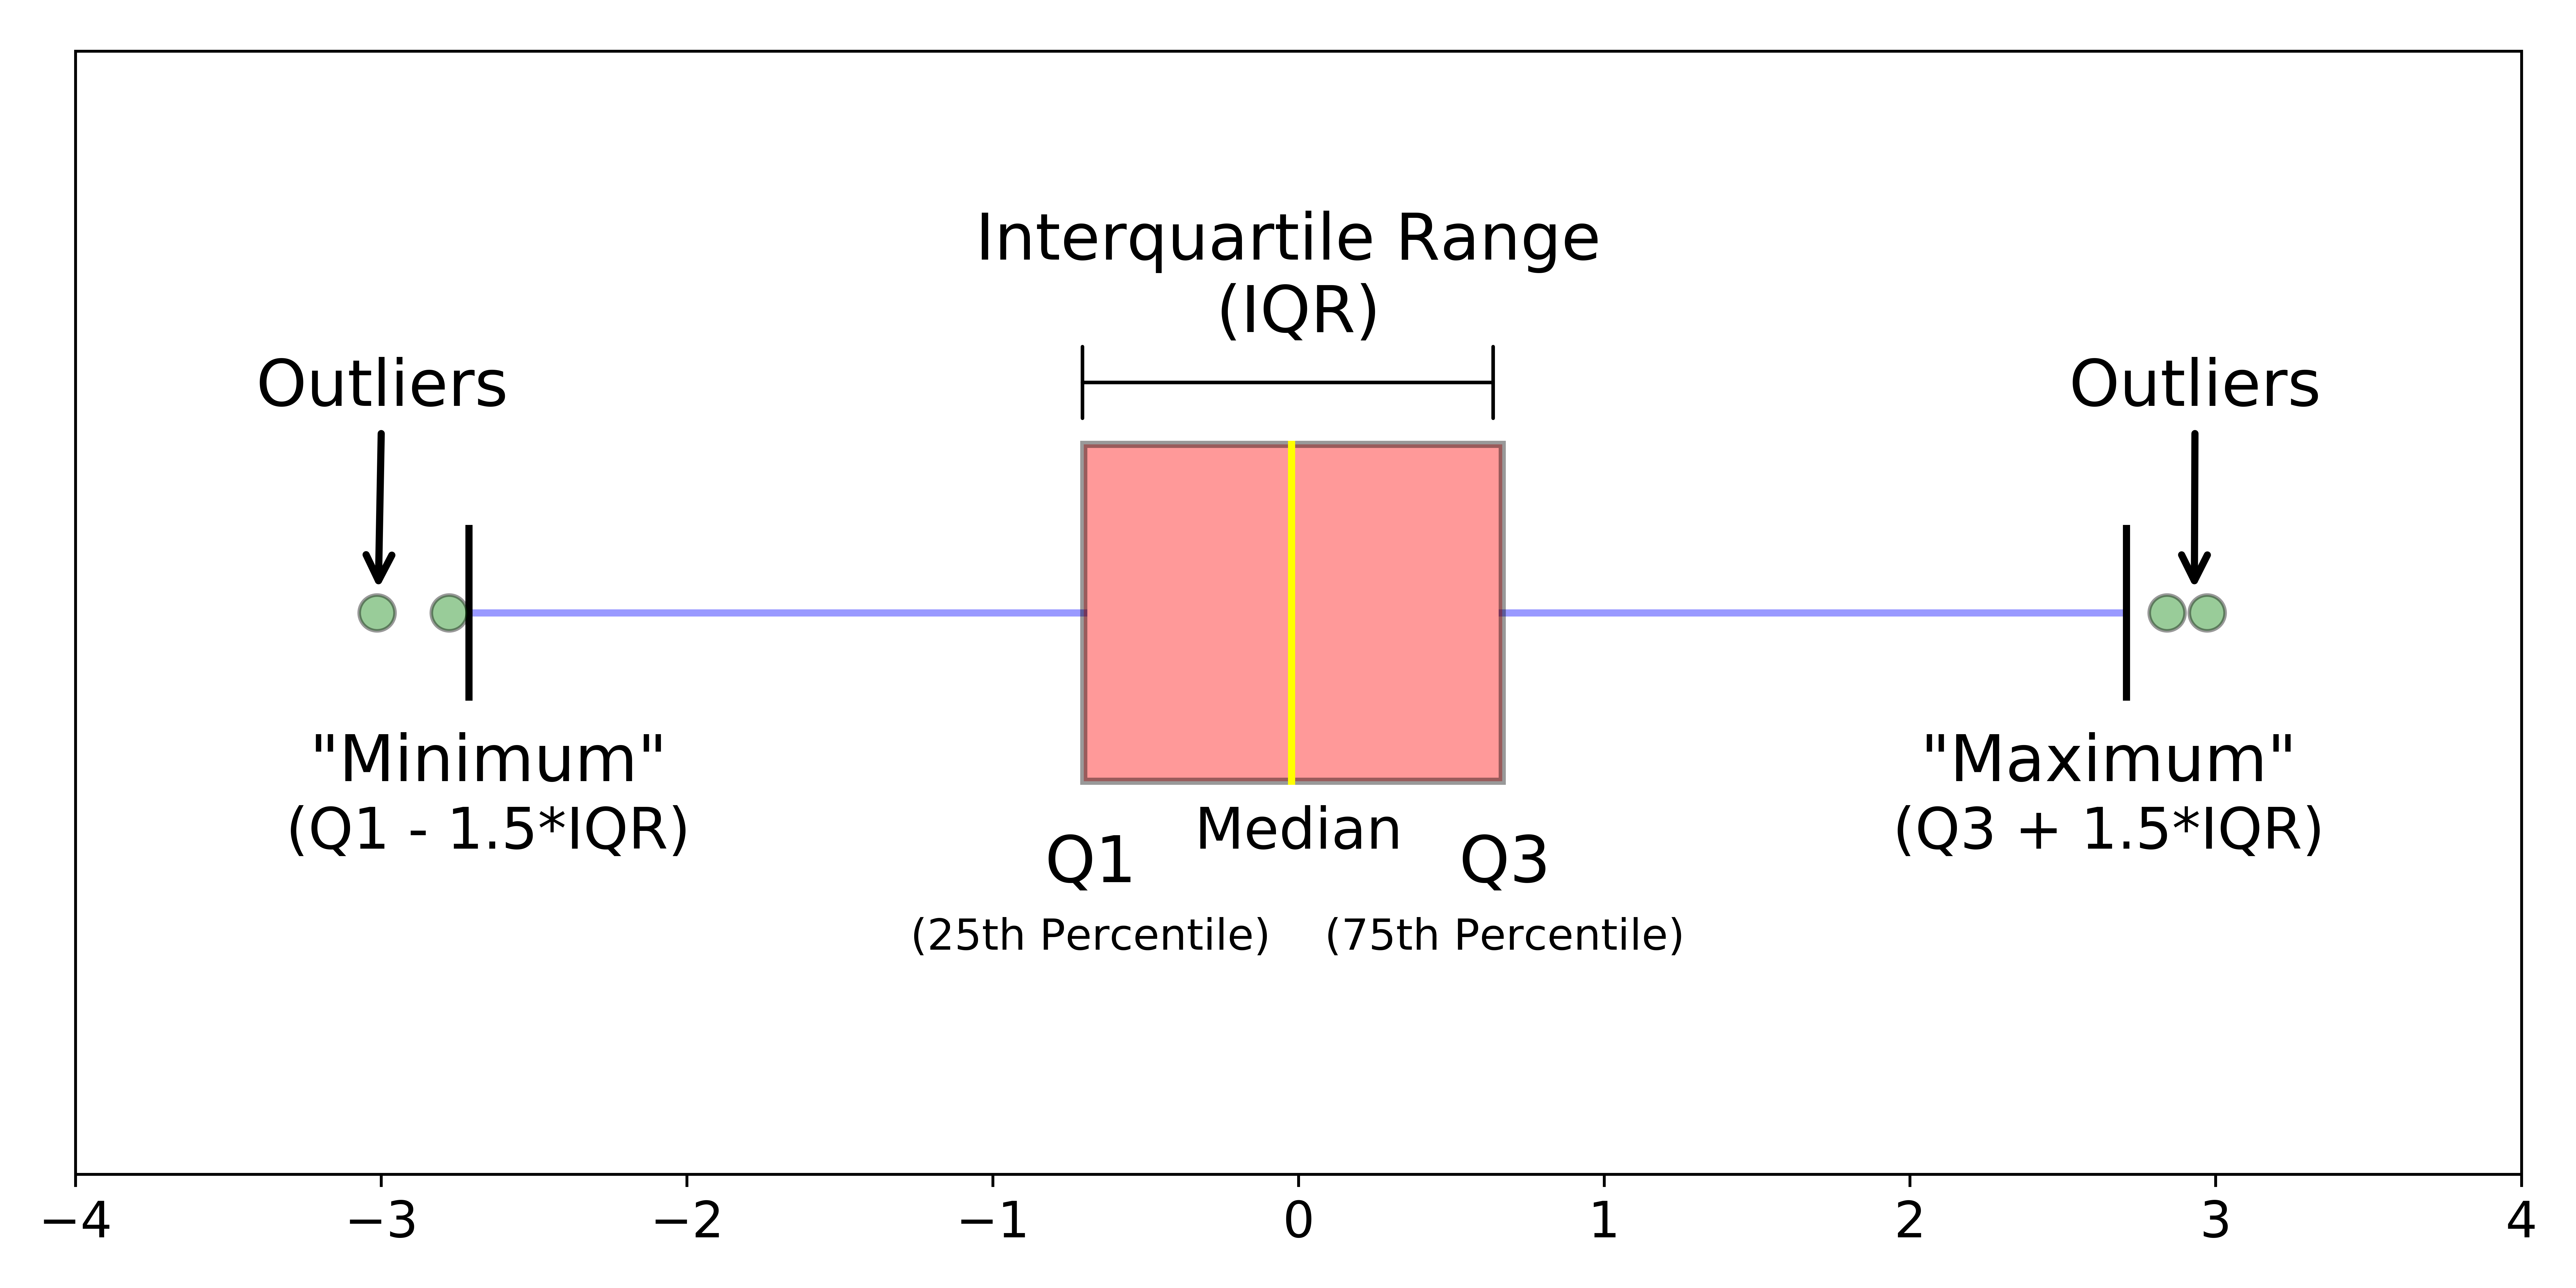

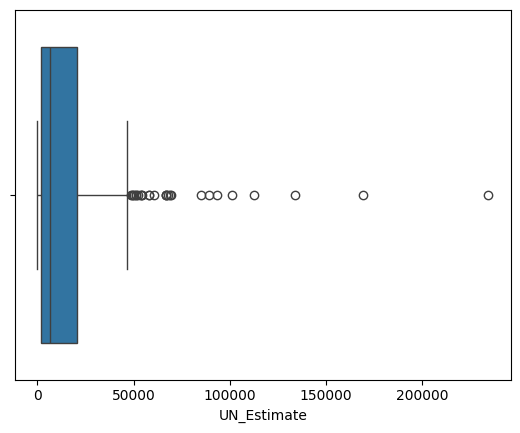

In [ ]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [ ]:
df[df["UN_Estimate"]>50000].count()

,0
Country/Territory,24
UN_Region,24
IMF_Estimate,24
IMF_Year,24
WorldBank_Estimate,24
WorldBank_Year,24
UN_Estimate,24
UN_Year,24


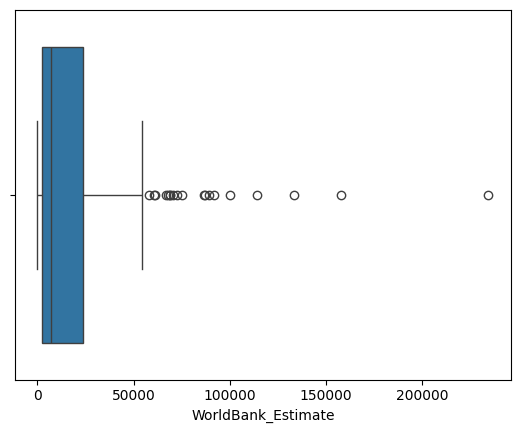

In [ ]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

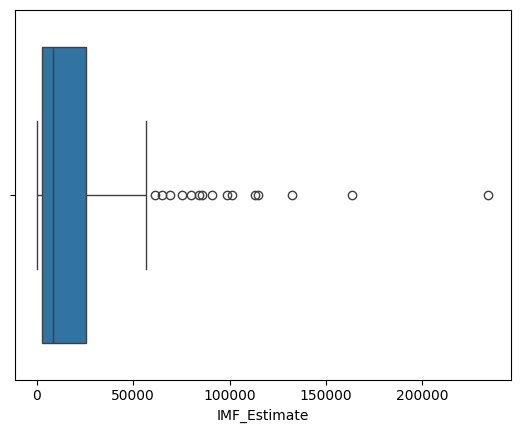

In [ ]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [ ]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,234316.5,0,234316,2021,234317,2021
2,Liechtenstein,Europe,163507.5,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372.0,2023,133590,2021,133745,2021
4,Ireland,Europe,114581.0,2023,100172,2021,101109,2021
5,Bermuda,Americas,113371.5,0,114090,2021,112653,2021


In [ ]:
df.UN_Estimate.mean()

17767.304932735427

In [ ]:
df.shape

(223, 8)

In [ ]:
df.UN_Estimate.median()

6396.0

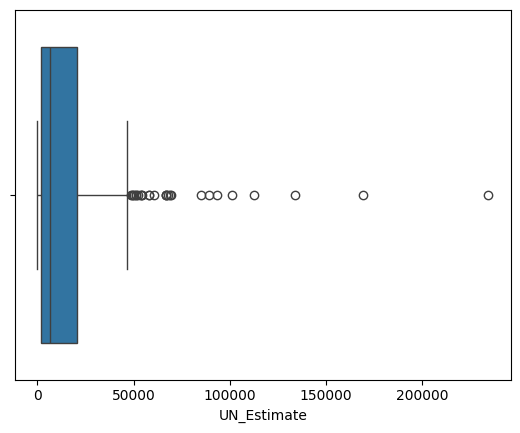

In [ ]:
sns.boxplot(x=df["UN_Estimate"])
plt.show()

## Removing outliers

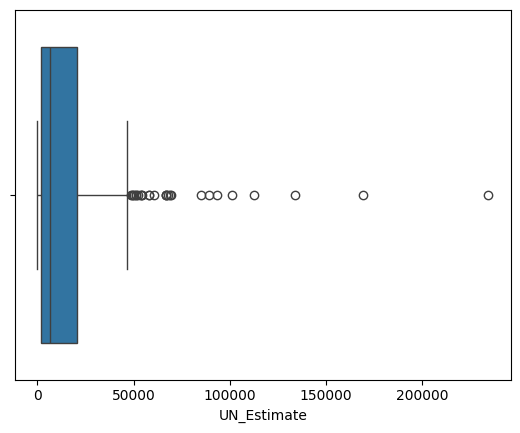

In [ ]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [ ]:
lower_q = df["UN_Estimate"].quantile(0.25) # 25%
lower_q # lower edge of the box

np.float64(2039.0)

In [ ]:
higher_q = df["UN_Estimate"].quantile(0.75) #75%
higher_q # upper edge

np.float64(20740.0)

### 50% of all countries by UN has their GDP per capita between 2039 - 20740

In [ ]:
iqr = higher_q - lower_q
iqr # inter quantile range
# iqr value is the difference between 25% and 75%

np.float64(18701.0)

In [ ]:
# upper whisker
upper_boundary = higher_q + 1.5 * iqr
upper_boundary

np.float64(48791.5)

In [ ]:
# lower whisker
lower_boundary = lower_q - 1.5 * iqr
lower_boundary

np.float64(-26012.5)

In [ ]:
df_filtered = df[(df["UN_Estimate"] < upper_boundary) & (df["UN_Estimate"] > lower_boundary)]
# it will create another df without outliers

In [ ]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
9,Isle of Man,Europe,43579.0,0,87158,2019,0,0
14,Channel Islands,Europe,37576.5,0,75153,2007,0,0
15,Faroe Islands,Europe,34505.0,0,69010,2021,0,0
29,Macau,Asia,50571.0,2023,43874,2021,43555,2021
30,United Arab Emirates,Asia,49451.0,2023,44316,2021,43295,2021


In [ ]:
df_filtered.shape
# there were 223 rows - 196 = 27 outliers dropped

(196, 8)

In [ ]:
df_filtered.UN_Estimate.mean()

np.float64(9415.168367346938)

In [ ]:
df.UN_Estimate.mean()

np.float64(17767.304932735427)

In [ ]:
#how can we create a table with following
df_filtered.WorldBank_Estimate.mean()

np.float64(11096.647959183674)

In [ ]:
df.WorldBank_Estimate.mean()

np.float64(18927.417040358745)

In [ ]:
df_filtered.IMF_Estimate.mean()

np.float64(11538.908163265307)

In [ ]:
df.IMF_Estimate.mean()

np.float64(19935.053811659192)

In [ ]:
df.IMF_Estimate.median()

8099.5

In [ ]:
df_filtered.IMF_Estimate.median()

6451.0